# Square Gradient Theory for Pure Components

This notebook has te purpose of showing examples of computing interfacial tension of pure fluids.

First it's needed to import the necessary modules

In [1]:
import numpy as np
from phasepy import component, prsveos
from phasepy.sgt import sgt_pure

In [2]:
#component creation
water =  component(name = 'Water', Tc = 647.13, Pc = 220.55, Zc = 0.229, Vc = 55.948, w = 0.344861,
                ksv = [ 0.87185176, -0.06621339], cii = [2.06553362e-26, 2.64204784e-23, 4.10320513e-21])

#EoS object creation
eos = prsveos(water)

First vapor-liquid equilibria has to be computed. This is done with the ```psat``` method from the EoS, which returns the pressure and densities at equilibrium.

In [3]:
T = 350 #K
Psat, vl, vv = eos.psat(T)
rhol = 1/vl
rhov = 1/vv

Once the equilibrium is computed, the interfacial tension can be computed as follow:

In [4]:
tension = sgt_pure(rhov, rhol, T, Psat, eos, full_output = False)
tension

array([63.25083234])

If all the calculated information is wanted, the ```full_output``` options allows to obtain, density profiles, interfacial tensionand and grand thermodynamic potential.

In [5]:
solution = sgt_pure(rhol, rhov, T, Psat, eos, full_output = True)

Text(0, 0.5, '$\\rho$ / cm$^3$ mol$^{-1}$')

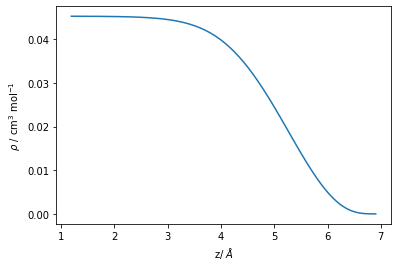

In [6]:
import matplotlib.pyplot as plt
z = solution.z
rho = solution.rho
plt.plot(z, rho)
plt.xlabel(r'z/ $\AA$')
plt.ylabel(r'$\rho$ / cm$^3$ mol$^{-1}$')

The procedure can be repeated in a for loop, allowing to study the interfacial behavior against the temperature. The results can be compared agaisnt experimental data.

In [7]:
#Experimental Saturation Data of water obtained from NIST
#Saturation Temperature in Kelvin
Tsat = np.array([290., 300., 310., 320., 330., 340., 350., 360., 370., 380.]) 

#Interfacial Tension in mN/m
tension = np.array([73.21 , 71.686, 70.106, 68.47 , 66.781, 65.04 , 63.248, 61.406,
       59.517, 57.581]) 

ten_sgt = np.zeros_like(tension)
n = len(Tsat)

for i in range(n):
    P, vl, vv = eos.psat(Tsat[i])
    rhol = 1/vl
    rhov = 1/vv
    ten_sgt[i] = sgt_pure(rhol, rhov, Tsat[i], P, eos, full_output = False)

C:\Users\boltzmann\miniconda3\lib\site-packages\phasepy-0.0.35-py3.7-win-amd64.egg\phasepy\sgt\sgtpuros.py:89: RuntimeWarning: invalid value encountered in sqrt
  tenint = np.nan_to_num(np.sqrt(2*dOm))


Text(0, 0.5, 'IFT / mN/m')

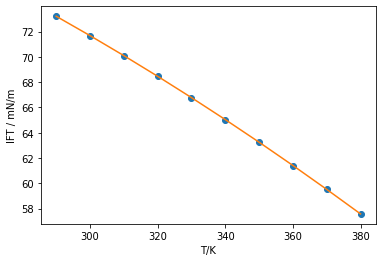

In [8]:
plt.plot(Tsat, tension, 'o')
plt.plot(Tsat, ten_sgt)
plt.xlabel('T/K')
plt.ylabel('IFT / mN/m')